# Ciência de Dados - Artigo

Dataset: https://www.kaggle.com/datasets/govindaramsriram/sleep-time-prediction

## Funções prontas

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn import datasets
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
from google.colab import files
uploaded = files.upload()

Saving sleeptime_prediction_dataset.csv to sleeptime_prediction_dataset.csv


In [3]:
data = pd.read_csv('sleeptime_prediction_dataset.csv')

In [4]:
data

,WorkoutTime,ReadingTime,PhoneTime,WorkHours,CaffeineIntake,RelaxationTime,SleepTime
0,1.12,0.52,3.29,7.89,216.08,0.75,3.45
1,2.85,0.49,4.22,5.03,206.18,0.67,4.88
2,2.20,1.81,4.04,9.23,28.73,0.35,3.61
3,1.80,0.50,1.62,7.68,276.77,1.21,4.94
4,0.47,0.54,1.60,4.94,170.54,0.95,5.50
...,...,...,...,...,...,...,...
1995,1.97,0.88,3.74,5.64,257.30,0.01,4.24
1996,2.87,0.67,3.01,5.26,269.25,1.75,5.89
1997,0.21,0.79,4.06,6.73,284.01,0.61,3.00
1998,0.17,1.06,2.94,9.45,119.25,1.88,3.53


### Cálculos de estimativas de localização

In [5]:
numeric_columns = data.select_dtypes(include=[np.number]).columns.tolist()
print("Colunas do dataset:", data.columns.tolist())

Colunas do dataset: ['WorkoutTime', 'ReadingTime', 'PhoneTime', 'WorkHours', 'CaffeineIntake', 'RelaxationTime', 'SleepTime']


In [6]:
colunas = ["WorkoutTime", "ReadingTime", "PhoneTime", "WorkHours", "CaffeineIntake", "RelaxationTime", "SleepTime"]
for coluna in colunas:
    if coluna in data.columns:
        data[coluna] = pd.to_numeric(data[coluna], errors='coerce')

def calcula_media(atributo):
    return atributo.mean()
def calcula_media_ponderada(atributo, pesos):
    return np.average(atributo, weights=pesos)
def calcula_media_truncada(atributo, percentual=0.1):
    limite_inferior = atributo.quantile(percentual)
    limite_superior = atributo.quantile(1 - percentual)
    return atributo[(atributo >= limite_inferior) & (atributo <= limite_superior)].mean()
def calcula_mediana(atributo):
    return atributo.median()
def identifica_outliers(atributo):
    q1 = atributo.quantile(0.25)
    q3 = atributo.quantile(0.75)
    iqr = q3 - q1
    limite_inferior = q1 - 1.5 * iqr
    limite_superior = q3 + 1.5 * iqr
    return atributo[(atributo < limite_inferior) | (atributo > limite_superior)]
for column in colunas:
    if column in data.columns:
        print(f"\nAtributo: {column}")
        print(f"Média: {calcula_media(data[column])}")
        pesos = np.ones(len(data[column]))
        print(f"Média Ponderada: {calcula_media_ponderada(data[column], pesos)}")
        print(f"Média Truncada: {calcula_media_truncada(data[column])}")
        print(f"Mediana: {calcula_mediana(data[column])}")
        outliers = identifica_outliers(data[column])
        print(f"Outliers: {outliers.tolist() if not outliers.empty else 'Nenhum outlier encontrado.'}")


Atributo: WorkoutTime
Média: 1.4959149999999999
Média Ponderada: 1.4959149999999999
Média Truncada: 1.4954840724547158
Mediana: 1.52
Outliers: Nenhum outlier encontrado.

Atributo: ReadingTime
Média: 0.992785
Média Ponderada: 0.992785
Média Truncada: 0.9942262274704786
Mediana: 0.99
Outliers: Nenhum outlier encontrado.

Atributo: PhoneTime
Média: 2.985195
Média Ponderada: 2.985195
Média Truncada: 2.976232064878353
Mediana: 2.965
Outliers: Nenhum outlier encontrado.

Atributo: WorkHours
Média: 6.926945
Média Ponderada: 6.926945
Média Truncada: 6.916410736579276
Mediana: 6.91
Outliers: Nenhum outlier encontrado.

Atributo: CaffeineIntake
Média: 147.49378
Média Ponderada: 147.49378
Média Truncada: 147.08545625
Mediana: 146.01
Outliers: Nenhum outlier encontrado.

Atributo: RelaxationTime
Média: 1.010955
Média Ponderada: 1.010955
Média Truncada: 1.0147753846153846
Mediana: 1.01
Outliers: Nenhum outlier encontrado.

Atributo: SleepTime
Média: 4.884375
Média Ponderada: 4.884375
Média Trunca

In [7]:
print(data['SleepTime'].describe())

y = pd.cut(data['SleepTime'], bins=[0, 5, 7, 9, 24], labels=['Muito Baixo', 'Baixo', 'Normal', 'Alto'])

print("Classes de y:", y.value_counts())

y = y.cat.codes

count    2000.000000
mean        4.884375
std         2.028892
min         0.150000
25%         3.840000
50%         4.600000
75%         5.470000
max        19.810000
Name: SleepTime, dtype: float64
Classes de y: SleepTime
Muito Baixo    1246
Baixo           674
Alto             50
Normal           30
Name: count, dtype: int64


<ipython-input-8-cee1dcea9f31>:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Categoria')


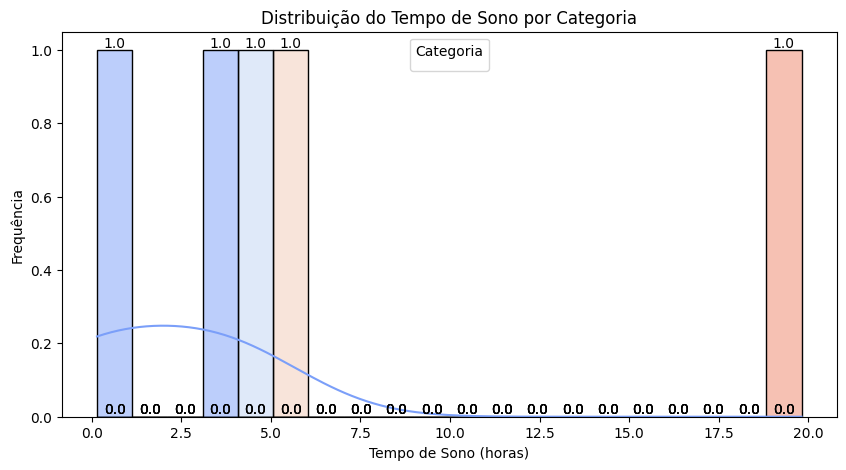

<ipython-input-8-cee1dcea9f31>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_classes, x='Categoria', y='Contagem', palette='coolwarm')


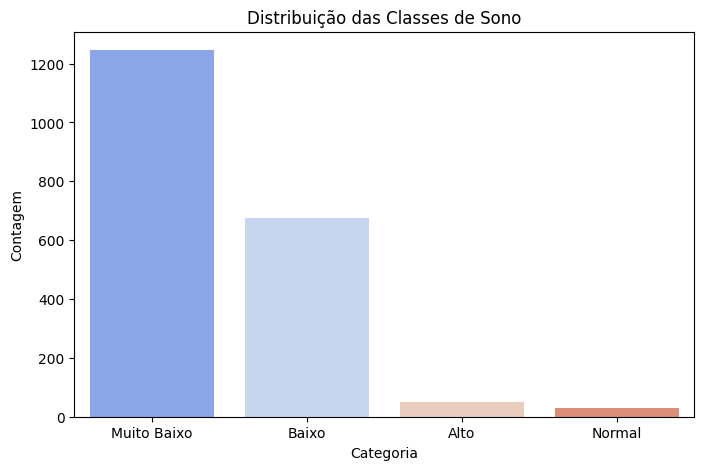

In [8]:
df = pd.DataFrame({
    'SleepTime': [0.15, 3.84, 4.6, 5.47, 19.81],
    'Category': ['Muito Baixo', 'Muito Baixo', 'Baixo', 'Alto', 'Normal']
})

plt.figure(figsize=(10, 5))
ax = sns.histplot(df, x='SleepTime', hue='Category', bins=20, kde=True, palette='coolwarm')

for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', label_type='edge')

plt.xlabel('Tempo de Sono (horas)')
plt.ylabel('Frequência')
plt.title('Distribuição do Tempo de Sono por Categoria')
plt.legend(title='Categoria')
plt.show()

df_classes = pd.DataFrame({
    'Categoria': ['Muito Baixo', 'Baixo', 'Alto', 'Normal'],
    'Contagem': [1246, 674, 50, 30]
})

plt.figure(figsize=(8, 5))
sns.barplot(data=df_classes, x='Categoria', y='Contagem', palette='coolwarm')
plt.xlabel('Categoria')
plt.ylabel('Contagem')
plt.title('Distribuição das Classes de Sono')
plt.show()


In [9]:
def tratar_outliers(df, coluna):
    q1 = df[coluna].quantile(0.25)
    q3 = df[coluna].quantile(0.75)
    iqr = q3 - q1
    limite_inferior = q1 - 1.5 * iqr
    limite_superior = q3 + 1.5 * iqr
    df[coluna] = np.clip(df[coluna], limite_inferior, limite_superior)

for coluna in colunas:
    if coluna in data.columns:
        tratar_outliers(data, coluna)

scaler = StandardScaler()
data[colunas] = scaler.fit_transform(data[colunas])


### Cálculos de estimativas de variabilidade

In [10]:
colunas = ["WorkoutTime", "ReadingTime", "PhoneTime", "WorkHours", "CaffeineIntake", "RelaxationTime", "SleepTime"]
for coluna in colunas:
    if coluna in data.columns:
        data[coluna] = pd.to_numeric(data[coluna], errors='coerce')

def calcular_media(valores):
    return valores.mean()
def calcular_desvios(valores, media):
    return valores - media
def calcular_variancia(valores):
    n = len(valores)
    media = calcular_media(valores)
    desvios = calcular_desvios(valores, media)
    return sum(d ** 2 for d in desvios) / (n - 1)
def calcular_desvio_padrao(variancia):
    return math.sqrt(variancia)
def calcular_percentil(valores, percentil):
    valores_ordenados = sorted(valores)
    indice = int((percentil / 100) * len(valores_ordenados))
    return valores_ordenados[max(0, min(indice, len(valores_ordenados) - 1))]
for coluna in colunas:
    if coluna in data.columns:
        valores = data[coluna].dropna()
        print(f"\nColuna: {coluna}")
        media = calcular_media(valores)
        print(f"Média: {media}")
        variancia = calcular_variancia(valores)
        print(f"Variância: {variancia}")
        desvio_padrao = calcular_desvio_padrao(variancia)
        print(f"Desvio Padrão: {desvio_padrao}")
        p25 = calcular_percentil(valores, 25)
        p50 = calcular_percentil(valores, 50)
        p75 = calcular_percentil(valores, 75)

        print(f"Percentil 25: {p25}")
        print(f"Percentil 50 (Mediana): {p50}")
        print(f"Percentil 75: {p75}")


Coluna: WorkoutTime
Média: 1.3855583347321954e-16
Variância: 1.0005002501250604
Desvio Padrão: 1.0002500937890786
Percentil 25: -0.8967329824522737
Percentil 50 (Mediana): 0.027481106585779805
Percentil 75: 0.8604147917682231

Coluna: ReadingTime
Média: -5.1514348342607266e-17
Variância: 1.0005002501250644
Desvio Padrão: 1.0002500937890806
Percentil 25: -0.8538125623679715
Percentil 50 (Mediana): -0.004825366003824857
Percentil 75: 0.8788143689874298

Coluna: PhoneTime
Média: -4.1744385725905886e-17
Variância: 1.0005002501250648
Desvio Padrão: 1.0002500937890808
Percentil 25: -0.8642685546569524
Percentil 50 (Mediana): -0.013195967310941331
Percentil 75: 0.8465610341916613

Coluna: WorkHours
Média: 4.085620730620576e-17
Variância: 1.0005002501250633
Desvio Padrão: 1.00025009378908
Percentil 25: -0.8627914284684786
Percentil 50 (Mediana): -0.009832240436195133
Percentil 75: 0.8721391648760978

Coluna: CaffeineIntake
Média: 1.5987211554602254e-16
Variância: 1.0005002501250622
Desvio Pad

### Distribuição de dados

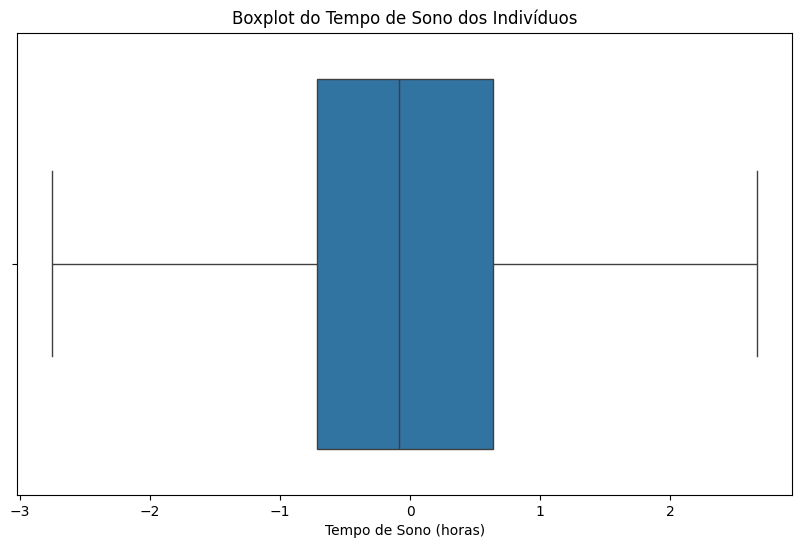

In [11]:

plt.figure(figsize=(10, 6))
sns.boxplot(x=data['SleepTime'])
plt.title('Boxplot do Tempo de Sono dos Indivíduos')
plt.xlabel('Tempo de Sono (horas)')
plt.show()


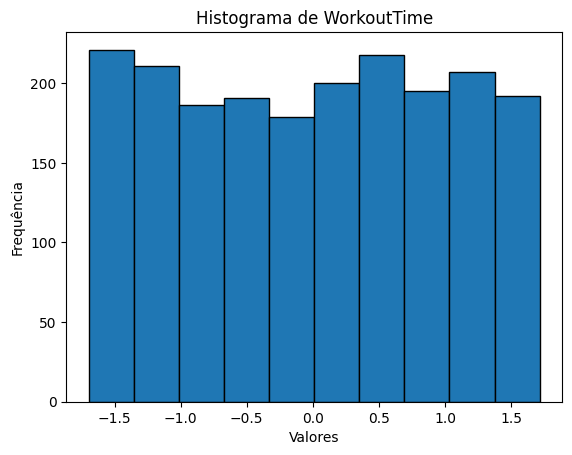

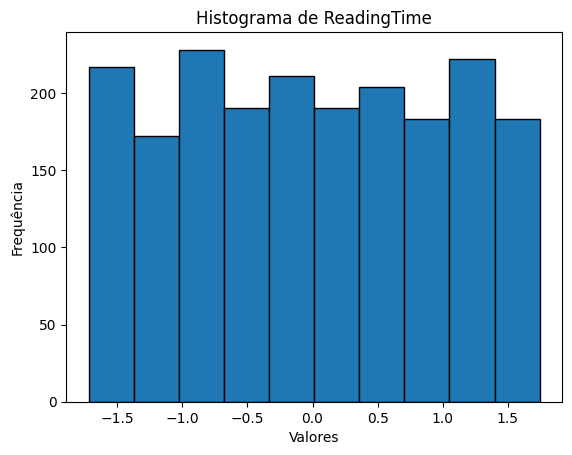

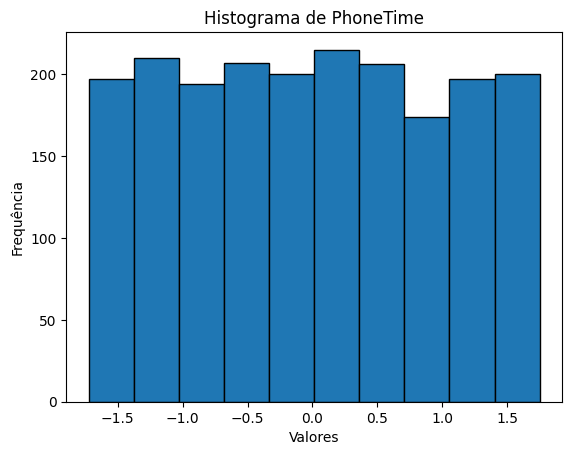

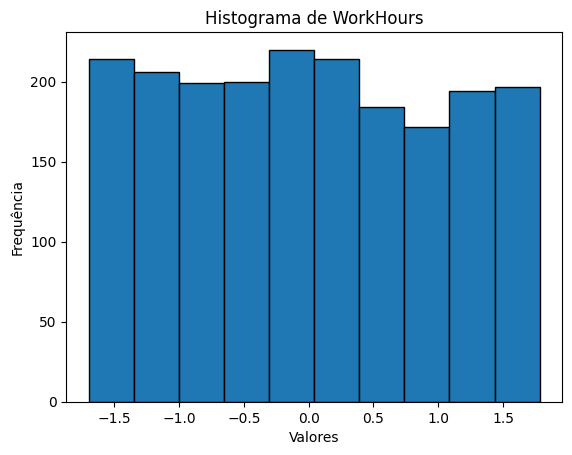

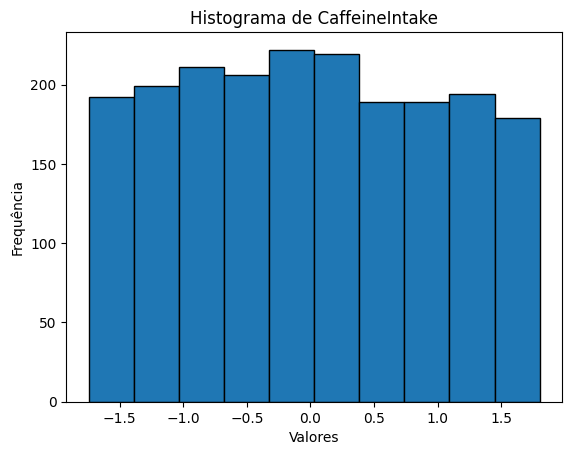

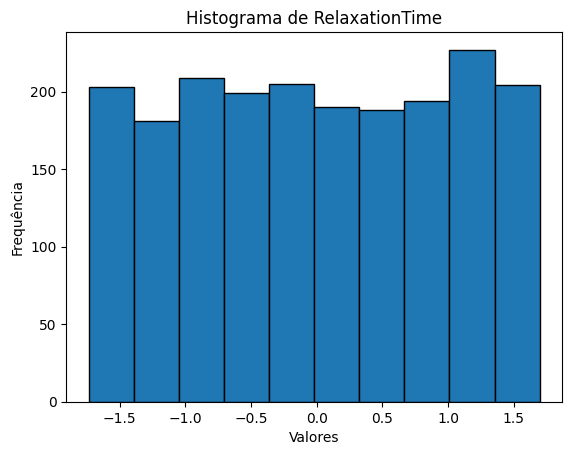

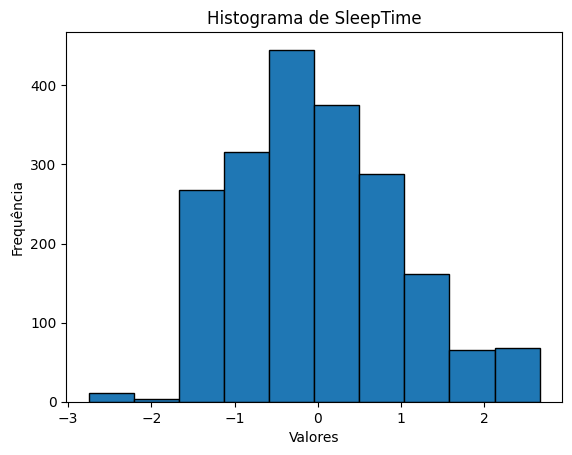

In [12]:
colunas = ["WorkoutTime", "ReadingTime", "PhoneTime", "WorkHours", "CaffeineIntake", "RelaxationTime", "SleepTime"]
def plt_hist(dados, coluna, bins=10):
    plt.hist(dados, bins, edgecolor='black')
    plt.title(f'Histograma de {coluna}')
    plt.xlabel('Valores')
    plt.ylabel('Frequência')
    plt.show()
for coluna in colunas:
    if coluna in data.columns:
        dados = data[coluna].dropna()
        plt_hist(dados, coluna)

### Correlações

In [13]:
def calcular_media(valores):
    return sum(valores) / len(valores)

def calcular_desvios(valores, media):
    return [x - media for x in valores]

def calcular_variancia(valores, media):
    desvios = calcular_desvios(valores, media)
    return sum(d ** 2 for d in desvios) / (len(valores) - 1)

def calcular_desvio_padrao(variancia):
    return math.sqrt(variancia)

def calcular_correlacao(x, y):
    media_x = calcular_media(x)
    media_y = calcular_media(y)
    variancia_x = calcular_variancia(x, media_x)
    variancia_y = calcular_variancia(y, media_y)
    desvio_x = calcular_desvio_padrao(variancia_x)
    desvio_y = calcular_desvio_padrao(variancia_y)

    covariancia = sum((x[i] - media_x) * (y[i] - media_y) for i in range(len(x))) / len(x)

    return covariancia / (desvio_x * desvio_y)

colunas = ['WorkoutTime', 'ReadingTime', 'PhoneTime', 'WorkHours', 'CaffeineIntake', 'RelaxationTime', 'SleepTime']

for i in range(len(colunas)):
    for j in range(i + 1, len(colunas)):
        coluna_x = colunas[i]
        coluna_y = colunas[j]

        df_clean = data[[coluna_x, coluna_y]].dropna(subset=[coluna_x, coluna_y]).reset_index(drop=True)

        x = df_clean[coluna_x]
        y = df_clean[coluna_y]

        correlacao = calcular_correlacao(x, y)

        print(f"Correlação de Pearson entre '{coluna_x}' e '{coluna_y}': {correlacao}")


Correlação de Pearson entre 'WorkoutTime' e 'ReadingTime': 0.0036579270177922725
Correlação de Pearson entre 'WorkoutTime' e 'PhoneTime': 0.032496302769486764
Correlação de Pearson entre 'WorkoutTime' e 'WorkHours': 0.03788508842909078
Correlação de Pearson entre 'WorkoutTime' e 'CaffeineIntake': -0.052644824610145226
Correlação de Pearson entre 'WorkoutTime' e 'RelaxationTime': 0.007778898798516548
Correlação de Pearson entre 'WorkoutTime' e 'SleepTime': 0.29576351334763434
Correlação de Pearson entre 'ReadingTime' e 'PhoneTime': 0.015170592561944838
Correlação de Pearson entre 'ReadingTime' e 'WorkHours': -0.025189881039765383
Correlação de Pearson entre 'ReadingTime' e 'CaffeineIntake': -0.0009951145555585454
Correlação de Pearson entre 'ReadingTime' e 'RelaxationTime': 0.026714286014591276
Correlação de Pearson entre 'ReadingTime' e 'SleepTime': 0.11816323563190664
Correlação de Pearson entre 'PhoneTime' e 'WorkHours': 0.016305680613769507
Correlação de Pearson entre 'PhoneTime' e 

## Arvore

Verificando valores fora do intervalo [0, 24]:
      WorkoutTime  ReadingTime  PhoneTime  WorkHours  CaffeineIntake  \
0       -0.428921    -0.819160   0.264705   0.558807        0.810425   
2        0.803365     1.415929   0.916036   1.336335       -1.403330   
5       -1.170574     0.913467  -0.794793   1.649667       -0.453430   
6       -1.512876    -0.160762  -0.473470   0.106217        0.938984   
8        0.346963    -1.494885   0.638135   0.483375        0.715541   
...           ...          ...        ...        ...             ...   
1991    -1.159164    -0.992423   0.160492  -0.903409       -0.590261   
1993    -1.239034    -1.546863   0.012857  -0.601681        1.159474   
1995     0.540933    -0.195414   0.655504  -0.746743        1.297486   
1997    -1.467236    -0.351351   0.933405  -0.114276        1.613095   
1998    -1.512876     0.116459  -0.039249   1.463988       -0.333733   

      RelaxationTime  SleepTime  
0          -0.448012  -1.044552  
2          -1.134738

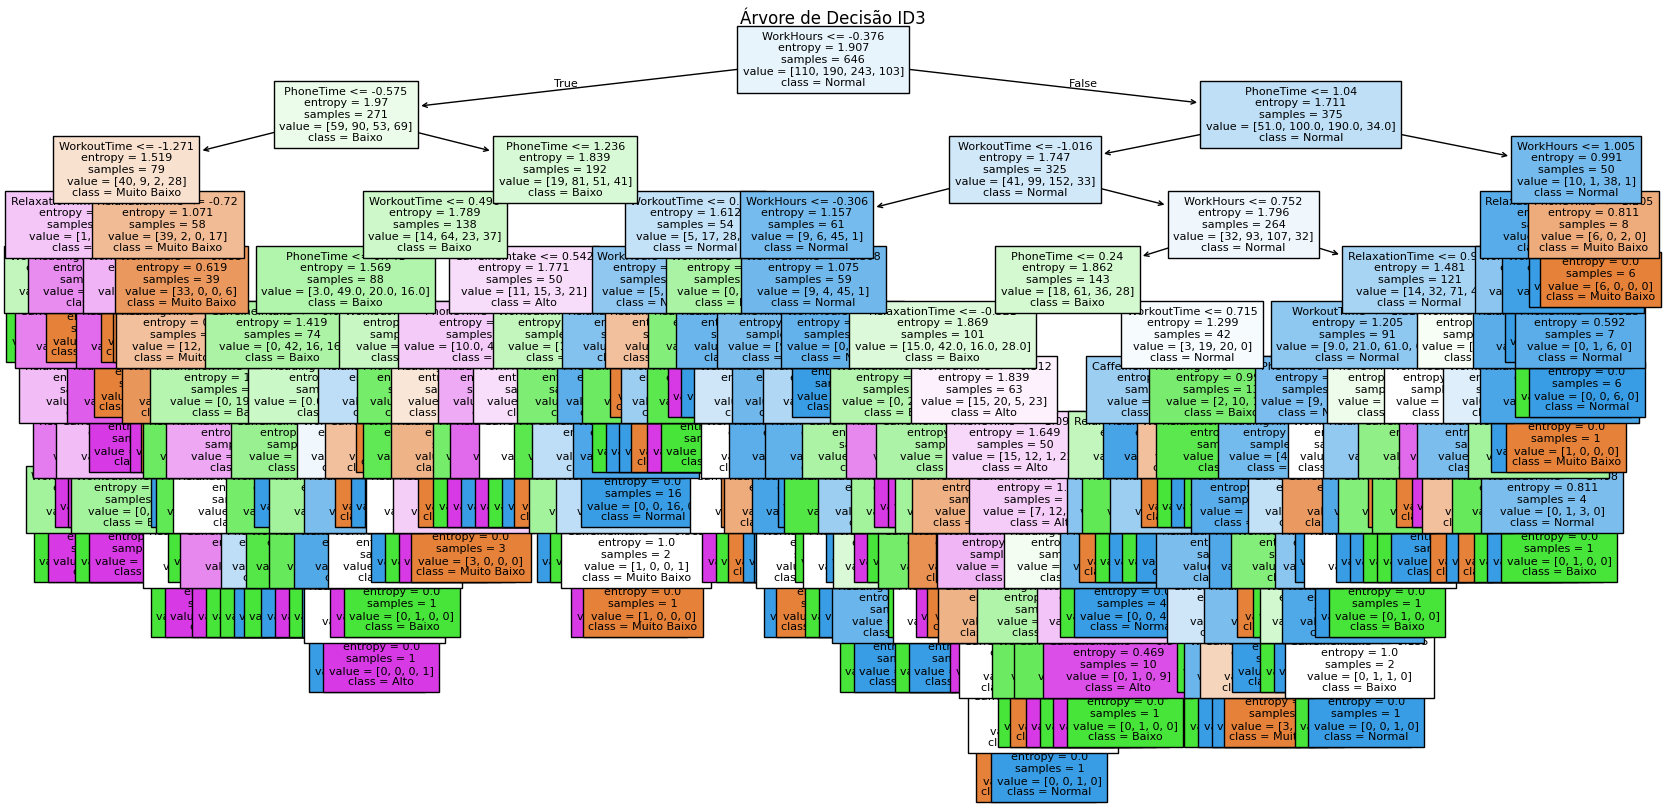

In [14]:
print("Verificando valores fora do intervalo [0, 24]:")
print(data[~data['SleepTime'].between(0, 24)])

data = data[data['SleepTime'].between(0, 24)]

sleep_min = data['SleepTime'].min()
sleep_max = data['SleepTime'].max()
bins = [sleep_min - 0.01, sleep_min + 0.5, sleep_min + 1, sleep_min + 1.5, sleep_max]
labels = ['Muito Baixo', 'Baixo', 'Normal', 'Alto']
y = pd.cut(data['SleepTime'], bins=bins, labels=labels)

scaler = StandardScaler()
X = data.drop(columns=['SleepTime'])
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)

model_id3 = DecisionTreeClassifier(criterion='entropy', random_state=42)
model_id3.fit(X_train, y_train)

y_pred = model_id3.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy do modelo: {accuracy:.4f}")

print("\nClassificação:")
print(classification_report(y_test, y_pred, target_names=labels))


plt.figure(figsize=(20, 10))
plot_tree(
    model_id3,
    feature_names=X.columns,
    class_names=labels,
    filled=True,
    fontsize=8
)
plt.title("Árvore de Decisão ID3")
plt.show()


# Rede Neural

Verificando valores fora do intervalo [0, 24]:
Empty DataFrame
Columns: [WorkoutTime, ReadingTime, PhoneTime, WorkHours, CaffeineIntake, RelaxationTime, SleepTime]
Index: []


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Acurácia da Rede Neural: 0.9422

Classificação - Rede Neural:
              precision    recall  f1-score   support

 Muito Baixo       0.87      0.85      0.86        47
       Baixo       0.96      0.95      0.96        81
      Normal       0.95      0.99      0.97       105
        Alto       0.95      0.91      0.93        44

    accuracy                           0.94       277
   macro avg       0.93      0.93      0.93       277
weighted avg       0.94      0.94      0.94       277



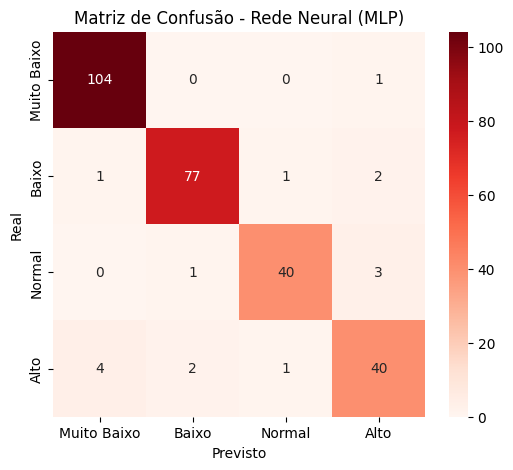

In [15]:
print("Verificando valores fora do intervalo [0, 24]:")
print(data[~data['SleepTime'].between(0, 24)])


data = data[data['SleepTime'].between(0, 24)]


sleep_min = data['SleepTime'].min()
sleep_max = data['SleepTime'].max()
bins = [sleep_min - 0.01, sleep_min + 0.5, sleep_min + 1, sleep_min + 1.5, sleep_max]
labels = ['Muito Baixo', 'Baixo', 'Normal', 'Alto']
y = pd.cut(data['SleepTime'], bins=bins, labels=labels)


if y.nunique() < 2:
    raise ValueError("O conjunto de dados não possui categorias suficientes para treinamento.")

X = data.drop(columns=['SleepTime'])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

mlp_model = MLPClassifier(
    hidden_layer_sizes=(40, 35, 46),
    activation="logistic",
    max_iter=500,
    random_state=42
)
mlp_model.fit(X_train, y_train)


y_pred_mlp = mlp_model.predict(X_test)


accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
print(f"Acurácia da Rede Neural: {accuracy_mlp:.4f}")


print("\nClassificação - Rede Neural:")
print(classification_report(y_test, y_pred_mlp, target_names=labels))

plt.figure(figsize=(6, 5))
cm = confusion_matrix(y_test, y_pred_mlp, labels=labels)
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", xticklabels=labels, yticklabels=labels)
plt.title("Matriz de Confusão - Rede Neural (MLP)")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.show()


<ipython-input-16-f7ac92211cec>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=accuracies, palette="Blues", edgecolor="black")


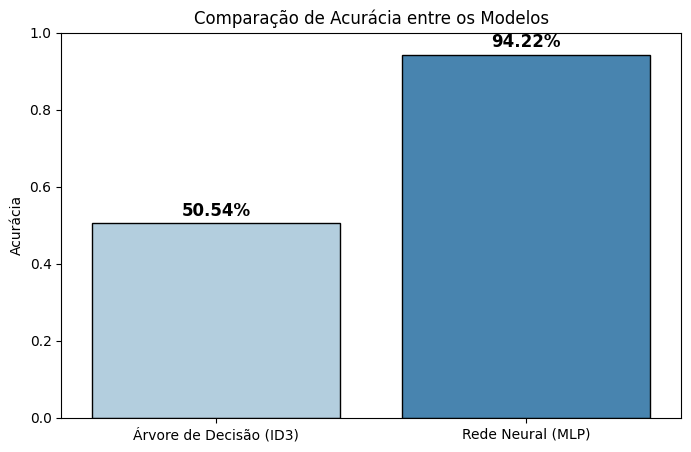

In [16]:
model_names = ["Árvore de Decisão (ID3)", "Rede Neural (MLP)"]
accuracies = [0.5054, 0.9422]

plt.figure(figsize=(8, 5))
sns.barplot(x=model_names, y=accuracies, palette="Blues", edgecolor="black")

plt.ylim(0, 1)
plt.ylabel("Acurácia")
plt.title("Comparação de Acurácia entre os Modelos")

for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.02, f"{acc:.2%}", ha="center", fontsize=12, fontweight="bold")

plt.show()